# What and Where Are The Most Expensive Natural Disasters in the US?
By Elias Lopez Dalla Nora and Ivy Mahncke

## Research Question

Natural disasters are the most drastic and visible effects of the worsening global climate crisis. Understanding
the toll they take on our communities is critical in the fight to improve our climate. We focused specifically on
examining the impact of natural disasters within the United States -- a country with both significant responsibility
for the climate crisis, and significant political influence to do something about it.

We asked the following question: What kinds of natural disasters are the most costly to recover from, and which
regions in the US are most burdened by this cost?

In asking this question we were confronted with an important decision: Could we afford to only think of cost in monetary
terms, or was there more to the story? We decided to analyze not just the monetary cost of these disasters, but also the
loss of human life as a result of their impact. We felt that understanding both angles could lead to a compelling story
for all audiences -- both governments that must understand the economic burden of ignoring climate change, and individuals
who may be called to action by the loss of other people in their communities.

Another important insight we carried into this research project is the limited scope of our question. It is true that by
focusing on US states we can describe a specific situation that is relevant to our audience. However, our dataset does
not examine the cost of natural disasters in other countries, nor does it examine the impact of natural disasters in US
territories such as Puerto Rico, who are often forgotten in conversations about the US. As we take on this endeavor, it
is important to remember that the worst crises due to natural disasters often occur in the Third World, whose governments
are not significant culprits of the ongoing climate crisis. Ideally, in understanding how climate change impacts even the
richest country in the world, our audience will also be compelled to learn about other territories and countries, who are
much more often victims of these disasters.

## Methodology


In order to approach our research question, we need to break down our process into three steps. Requesting the data, processing the data, and graphing the data. The following import statements import the files that handle those three actions respectively:

In [1]:
import fetch_data as f
import process_data as p
import graph_data as g

fetch_data.py contains one function called write_to_csv and its purpose is to request a dataset from the National Center of Environmental Impact (NCEI). The dataset has a complete list of natural disasters that have affected the U.S. and caused over 1 billion dollars in damages over the past 50 years. The dataset contains the following information: a short description of the natural disaster, the region or state it affected, the kind of disaster it was, the start and end date, the cost of damages, and the number of deaths. We thought that this dataset would best help us answer our research question because it specifically targeted the natural disasters that were the most costly in the history of the U.S., broke down the regions affected more or less clearly in the description section, and categorizes all of them by the time they began and ended.
The dataset is one of the files yielded from the compressed tar.gz file we requested and downloaded from the NCEI website. The tar.gz file has to be extracted from into a folder that the write_to_csv file also creates. The first parameter of the write_to_csv function is the link to the download and the second is the file path of the dataset in the created folder.

In [2]:
# request dataset from online and store it in a variable
f.write_to_csv("https://www.ncei.noaa.gov/archive/archive-management-system/OAS/bin/prd/jquery/download/209268.17.17.tar.gz","209268.17.17.tar.gz",)

Now that the data has been downloaded and stored, we turn to functions in the data processing file to format the data in a manner that can be visualized effectively.
One quick note is that we used the U.S. census region map to determine the regions that natural disasters affected. The list is below:

In [3]:
# establish universal regions, plus a scrap bin
region_list = ["Western", "Midwestern", "Southern", "Northeastern"]

The first function from the process_data.py file is read_csv_to_var which finds the file with the dataset (with the parameter being the file path) and converts it into a pandas dataframe. The other step taken here is that the Begin Date and End Date categories have the day and month removed from each row because we want to have some visualizations of damage costs and deaths over time, but that is happening by year.

In [4]:
disaster_data = p.read_csv_to_var(
    "./0209268/17.17/data/0-data/events-US-1980-2023.csv"
)

# modify dates to be less specific years
p.parse_all_years(disaster_data)

Our main function in process_data.py is organize_regions and it splits up the main dataframe into the disasters that have affected each region in particular. In the process of running organize_regions, many other functions are called and several variables need to be declared to produce the function's parameters.
The first of these is all the years that the dataframe covers. We know from the NCEI website that it's from 1980-2024, but the retrieve_unique_years function does that computationally given the years in the Begin Date and End Date columns of the dataframe. This is stored in the all_years variable.
The second is each unique disaster type because we also want to graph by the damage costs and deaths per unique disaster type. This is stored in the all_disaster_types variable.

One thing about the dataframe that we decided to explicitly change was the year system. It has data that goes 44 years back, but since one of our goals is to graph damage costs and deaths over time, having 44 individual bars in a graph is an ineffective visualization. Thus we wrote functions to group years together by fives 1980-1984, 1985-1989, etc...
This starts with the year_buckets variable and year_buckets_size variable that way we have strings that can be used to categorize sums of costs and deaths and a bucket_size int for computationally dividing the costs and deaths in the dataframe into groups of years.

Then, fill_all_regions takes the dataframe and categorizes each disaster into the region that it best fits into. If it fits into no or multiple region, the data is unfortunately thrown out because there isn't a clear way to visualize it.

Finally, organize_regions is run to obtain the damage costs and deaths per region that have resulted from these natural disasters.

In [5]:
all_years = p.retrieve_unique_years(disaster_data)
all_disaster_types = p.retrieve_unique_disaster_types(disaster_data)
year_buckets = ["1980 - 1984","1985 - 1989","1990 - 1994","1995 - 1999","2000 - 2004","2005 - 2009","2010 - 2014","2015 - 2019","2020 - 2023"] # TO FILL. buckets to group time data by (one/four/five/ten-year groups)
year_buckets_size = 5 # number of years per bucket
# convert the raw data (sorted by region) into graphable blocks of data
region_dict = p.fill_all_regions(disaster_data, region_list)
cost_of_regions, deaths_of_regions = p.organize_regions(region_dict, all_years, all_disaster_types, year_buckets_size)

The final file we make use of is graph_data.py to produce all of our visualizations. This first set of variables stores dataframes that are in the proper format to graph the damage costs and deaths per region over the course of the whole range of years.

In [6]:
# these are the two graphs that plot data comparing regions and ignoring time
plottable_countrywide_cost = g.plottable_by_region(cost_of_regions, all_disaster_types)
plottable_countrywide_death = g.plottable_by_region(deaths_of_regions, all_disaster_types)

This second set of variables stores dataframes that are in the proper format to graph the damage costs and deaths in each region over the time frame. Each row has both forms of data and there are as many rows as there are groups of five years.

In [7]:
# these are the eight graphs (cost and death per region) that show change with time
plottable_regions_cost = {}
plottable_regions_death = {}
for us_region in region_list:
    plottable_regions_cost[us_region] = g.plottable_by_time(cost_of_regions,us_region,year_buckets)
    plottable_regions_death[us_region] = g.plottable_by_time(deaths_of_regions,us_region,year_buckets)

## Results

We are now able to visualize and examine our sorted data. Let's first make some labels to use for the axes of graphs, which will compare different disasters' monetary and human cost across US regions and time. We will also create two variables that will make our axis labels more readable.

In [8]:
cost_label = "Total CPI-Adjusted Cost (Millions of Dollars)"
region_label = "US Region"
death_label = "Total Deaths"
time_label = "Time (half-decades)"

rotate_0 = 0
rotate_90 = 90

### Comparing Net Damages Between US Regions

The first two graphs will compare the four US regions in their accrued damages from fifty years of natural disasters. The first graph examines monetary cost of various types of natural disasters.

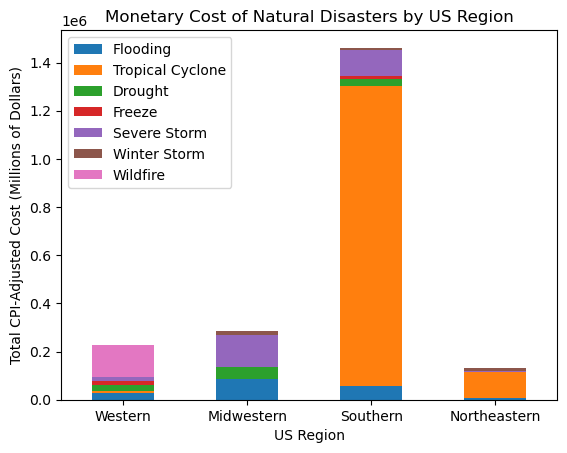

In [9]:
g.plot_dataframe(plottable_countrywide_cost,rotate_0,[region_label,cost_label,"Monetary Cost of Natural Disasters by US Region"])

As the graph shows, the American South suffers the most costly disasters by far, and this is almost entirely attributable to tropical cyclones. Additionally, flooding appears in the cost total of each US region, and both wildfires and severe storms accrue meaningful cost.

The second graph examines deaths as a result of various types of natural disasters across US regions. While the data is somewhat similar to the prior graph, there are some interesting differences.

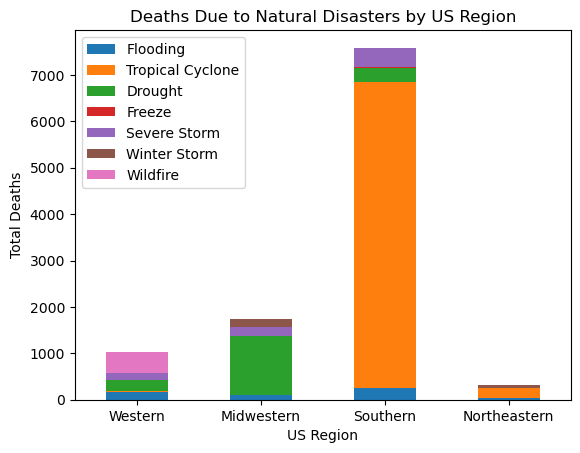

In [10]:
g.plot_dataframe(plottable_countrywide_death, rotate_0,[region_label, death_label, "Deaths Due to Natural Disasters by US Region"])

While the American South still dominates the data with deaths due to tropical cyclones, the other US regions have some interesting variation. Wildfires, for examine, are not as significant of a source of death as they are a source of monetary damages. Also, the Midwest had very little loss of life due to severe storms compared to monetary cost from the same disaster type, and droughts are shown to be more deadly than they are costly.

### Examining Impact of Natural Disasters In Individual Regions Over Time

Next we will consider how the damages due to natural disasters change over the course of fifty years. The first four graphs will only consider cost, and each will represent a different US region's data over fifty years.

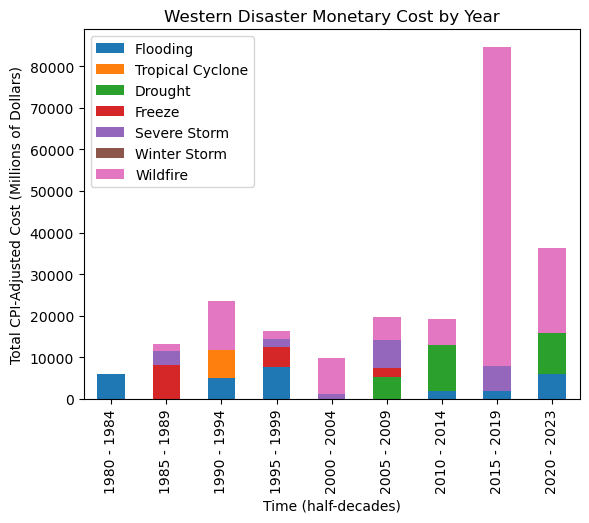

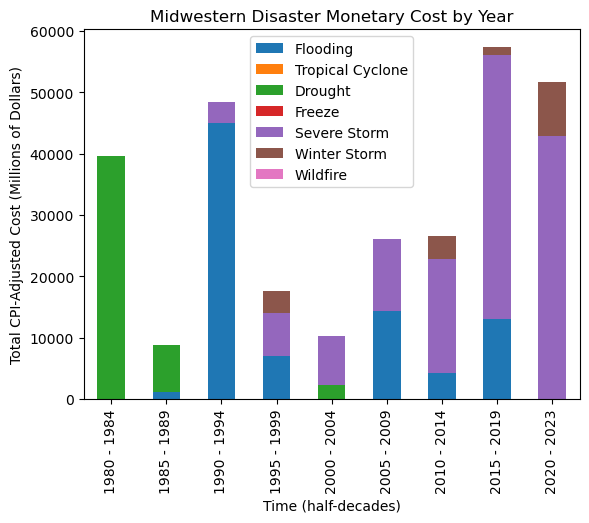

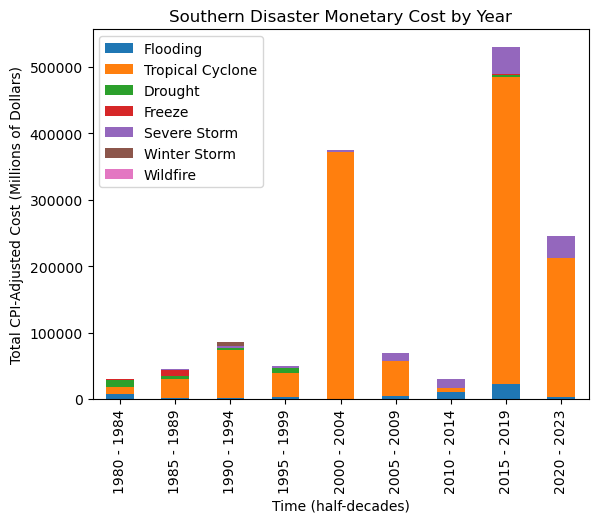

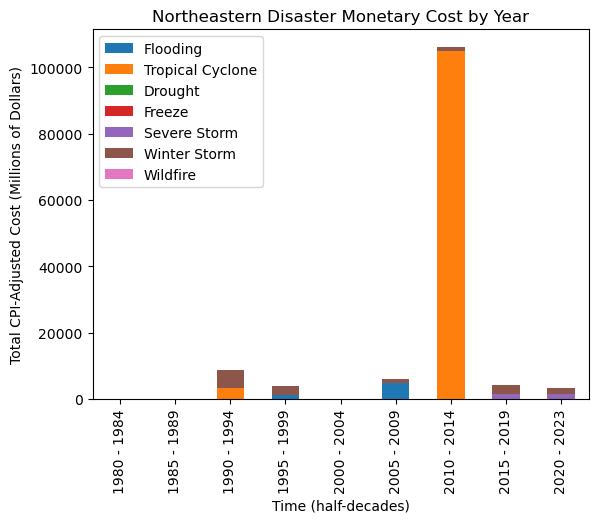

In [11]:
for region in region_list:
    g.plot_dataframe(plottable_regions_cost[region],rotate_90,[time_label,cost_label,f"{region} Disaster Monetary Cost by Year"])

Most notably, these graphs are demonstrate that the severity of the cost of natural disasters are worsening loosely over time. The Northeast, which was generally unimpacted by costly natural disasters, experienced one outlier during the 2010 -2014 time period, when a tropical cyclone ventured farther north than was usual. The West predictably was dominated by wildfires, and the tropical cyclone costs demonstrated in prior graphs was highlighted in the Southern graph here. The Midwest was the only region not dominated by a single disaster type, as it accrued similar costs for flooding and severe storms.

We will now repeat the process of examining individual regions in the context of deaths rather than cost. The following graphs in particular highlight how the costliest disasters are not always the deadliest disasters.

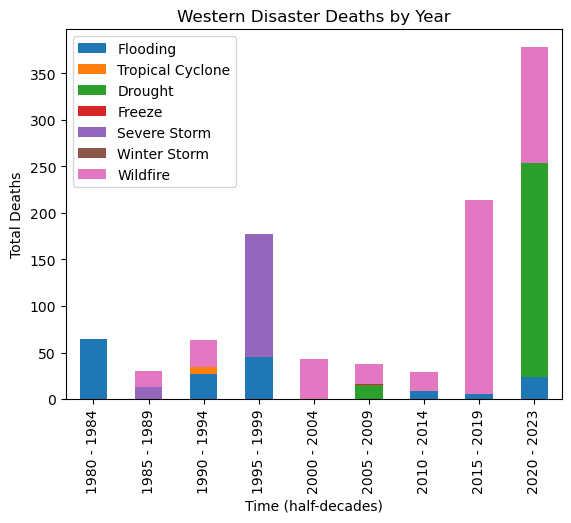

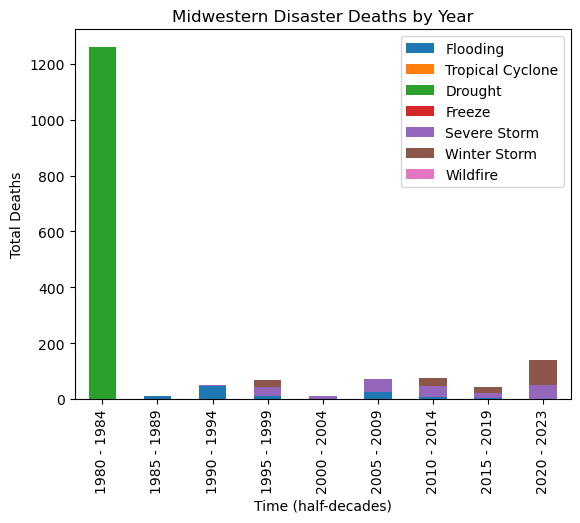

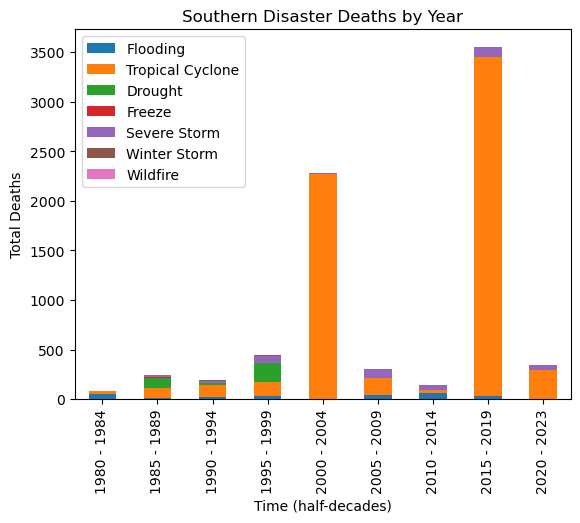

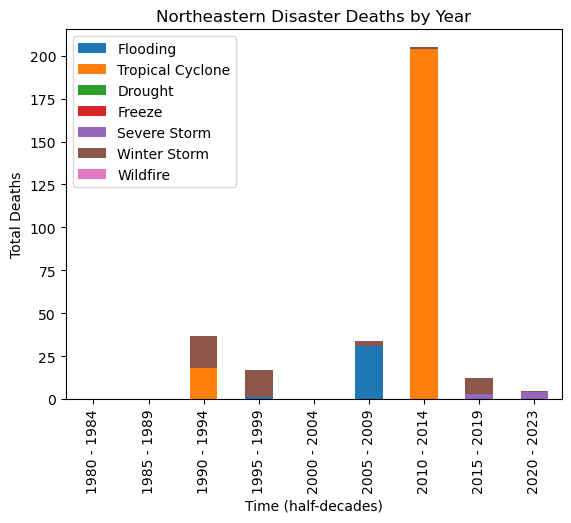

In [12]:
for region in region_list:
    g.plot_dataframe(plottable_regions_death[region],rotate_90,[time_label,death_label,f"{region} Disaster Deaths by Year"])

Unlike the costs, which were fairly consistent across years and disaster types, death due to natural disaster varied much more wildly. In each US region, one particular year group had a disaster type that accrued significantly more death than the rest of its datapoints. These were all likely specific freak events, like the 1980's flooding in the Midwest, or the Northeastern tropical cyclone that occurred in the 2010s. It is also important to note the axis values: the Southern tropical cyclones continue to dominate the dataset with deaths reaching the thousands, while neither the Western nor Northeastern regions experienced a time group with over four hundred deaths. While this is all interesting, these mass deaths tell us less about overall trends concerning disaster types or regions than they do about these specific events, and are therefore less useful in analysis.

Now that we have visualized our data in a variety of ways, we can interpret the significance of the information in the graphs, and provide insights onto what individuals and governments can do with it.

## Interpretation

### Conclusions and Insights

### Limitations of the Dataset

### Further Analysis
